In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

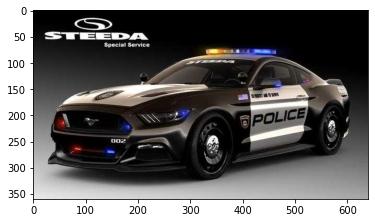

In [15]:
Data_dir = "C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train"

categories = ["Police", "Normal"]
 
for category in categories:
    path = os.path.join(Data_dir, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.COLOR_BGR2RGB)
        plt.imshow(img_array)
        plt.show()
        break
    break
    

In [3]:
def prepare(filepath):
    img_array = cv2.imread(filepath)
    
    # Convert the image to RGB format
    img_array_rgb = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
    
    # Define the color range for siren colors
    lower_siren_red = np.array([0, 0, 150])
    upper_siren_red = np.array([100, 100, 255])

    lower_siren_blue = np.array([150, 0, 0])
    upper_siren_blue = np.array([255, 100, 100])

    lower_siren_white = np.array([200, 200, 200])
    upper_siren_white = np.array([255, 255, 255])

    # Create masks for each siren color
    mask_red = cv2.inRange(img_array_rgb, lower_siren_red, upper_siren_red)
    mask_blue = cv2.inRange(img_array_rgb, lower_siren_blue, upper_siren_blue)
    mask_white = cv2.inRange(img_array_rgb, lower_siren_white, upper_siren_white)

    # Combine the masks to get the final mask for siren colors
    final_mask = mask_red | mask_blue | mask_white

    # Apply the mask to the original image
    segmented_img = cv2.bitwise_and(img_array, img_array, mask=final_mask)

    # Resize the segmented image to the specified size (224x224)
    resized_img = cv2.resize(segmented_img, (img_size, img_size))

    # Normalize pixel values to the range [0, 1]
    resized_img = resized_img / 255.0

    # Add an extra dimension for the batch
    resized_img = np.array(resized_img).reshape(-1, img_size, img_size, 3)
    
    return resized_img


In [27]:
def calculate_color_range(image_paths):
    # Calculate the average color of siren in the sample images
    average_color = np.zeros(3)
    total_pixels = 0

    for image_path in image_paths:
        img = cv2.imread(image_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Define a mask for the siren colors
        mask_siren = cv2.inRange(img_rgb, np.array([0, 0, 150]), np.array([100, 100, 255]))

        # Calculate the average color
        average_color += np.sum(np.multiply(img_rgb, np.stack([mask_siren, mask_siren, mask_siren], axis=-1)))
        total_pixels += np.sum(mask_siren)

    average_color /= total_pixels

    # Define a range around the average color
    color_range = 30  # You can adjust this value based on your preference

    lower_range = np.maximum(average_color - color_range, [0, 0, 0])
    upper_range = np.minimum(average_color + color_range, [255, 255, 255])

    return lower_range, upper_range

def prepare(filepath):
    img_array = cv2.imread(filepath)

    # Convert the image to RGB format
    img_array_rgb = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)

    # Calculate the color range dynamically based on training data
    lower_siren, upper_siren = calculate_color_range([os.path.join(Data_dir, category, img) for category in categories for img in os.listdir(os.path.join(Data_dir, category))])

    # Create a mask for siren colors
    mask_siren = cv2.inRange(img_array_rgb, lower_siren, upper_siren)

    # Apply the mask to the original image
    segmented_img = cv2.bitwise_and(img_array, img_array, mask=mask_siren)

    # Resize the segmented image to the specified size (224x224)
    resized_img = cv2.resize(segmented_img, (img_size, img_size))

    # Normalize pixel values to the range [0, 1]
    resized_img = resized_img / 255.0

    # Add an extra dimension for the batch
    resized_img = np.array(resized_img).reshape(-1, img_size, img_size, 3)

    return resized_img


In [28]:
training_data = []
img_size = 224
def create_train_data():
    for category in categories:
        path = os.path.join(Data_dir, category)
        class_num = categories.index(category)
        print(f"Processing images in category {category}...")
        for img in os.listdir(path):
            try:
                img_path = os.path.join(path, img)
                processed_image = prepare(img_path)
                print(f"Processed image: {img_path}")
                training_data.append([processed_image, class_num])
            except Exception as e:
                print(f"Error processing image {img_path}: {e}")

create_train_data()
print(f"Number of training examples: {len(training_data)}")

Processing images in category Police...
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\0366C1DSTJGL.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\05921XNUOU1X.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\0862TJ9ITTCU.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\09O3G4M81I3M.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\09S60T7Y0252.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\0C8GPL22N2FX.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/tra

Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\45KLKOC61Q0Y.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\46C1283U5Q6R.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\47H9NCWAMGRY.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\47VA8Z7IBMSA.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\48PDTY01J2D6.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\49DVIA7ZALTA.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\49QAD2GWN4YG.jpg
Processed ima

Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\76DLAR8WLT1J.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\7813Z1XJCG7V.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\7BAP33BUHXCM.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\7C00NZQBC3H7.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\7EX2S39V7S57.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\7JMHA072ZK2O.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\7KYGD0PWRXFB.jpg
Processed ima

Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\9NJVLHHT9Q3P.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\9NNUG1NJ3HGD.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\9PEB2IENBUU2.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\9Q7VCUNPV073.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\9S8UBLUCSAUR.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\9SDXI22GJLST.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\9SESAAZP56XM.jpg
Processed ima

Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\CE17SA0C0JZH.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\CEAZK7Y4TLD0.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\CG04X9YZXW2P.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\CGJSMYJAIE2K.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\CHJIDSX0TROD.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\CIWTHDPTUIR0.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\CIXFQCDSK5ON.jpg
Processed ima

Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\ERP8P1488NGT.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\ES25VSOW5GEM.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\EVMAYS5OV8OR.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\EW5X0XLJCKCZ.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\F137XPITWUQG.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\F31WHFYCLEPT.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\F7YKG6AH3CIQ.jpg
Processed ima

Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\I2NTPZEP9DES.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\I4P0U9WCLKBU.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\ICVPXYDRKXJ2.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\IFSEYFRGC6W4.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\IG3E1K67Z6XD.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\IGH5RDL054LL.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\II9DUOH8F5E6.jpg
Processed ima

Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\KV0IQ1Z1SQ94.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\KZ5Y6MM34LWA.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\L0WU8B8XMK2I.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\L1N4OGBHHL7A.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\L2XEQND9H4N4.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\L2YFN8H1AFMQ.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\L87SE1LBBZAH.jpg
Processed ima

Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\NRJGUZN02WF4.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\NVP1WIDQ7WHI.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\NYT0LHL5MS9D.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\O2P6D9B0ZACW.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\O3L5QTO78MB5.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\O3QQ7X8L3ERY.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\O4KRCKWWML6Z.jpg
Processed ima

Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\Q6FQAM61238V.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\Q6R99XPK9MPW.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\Q9Z5BB1VB7IW.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\QD2L4TXERMWE.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\QE2GH6UVE4LN.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\QECDVKQ56227.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\QEVJXXBDTO99.jpg
Processed ima

Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\SU8N701I7F5S.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\SWTF3H7TTR0H.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\SX8BEGZQW5TL.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\SYPWR5OJGL30.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\SZYXUXLPGD24.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\T0GOM8G7P66O.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\T1DUAFNXBWY7.jpg
Processed ima

Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\VIG89ECS0M8P.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\VIZ8TI8IR7IZ.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\VLFO5CSP33V5.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\VM4JMSDWMRYQ.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\VN7MHBEAVKBR.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\VO1W4HKTUUEK.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\VOCIT4YUYPIW.jpg
Processed ima

Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\XSN4ZNKFI365.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\XZDDNM2M3220.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\XZGUTYXV9PNE.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\XZM9QI4RBRC7.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\Y1UXM1H2MDVI.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\Y31V535MV32C.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Police\Y7SNKJ1DONQI.jpg
Processed ima

Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-0ACAD937-70A4-46F0-8E49-0CAE6F942CF2-png_jpg.rf.3cf4d6690e583761f9e14d026073ebfa.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-0ACAD937-70A4-46F0-8E49-0CAE6F942CF2-png_jpg.rf.6aa41d69f9577ed831c4a64cd8c9a677.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-0ACAD937-70A4-46F0-8E49-0CAE6F942CF2-png_jpg.rf.86b22e06333e5498d9621bf3e803b694.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-0AE13AAD-2BD5-490E-B245-D51927B1EBBC-png_jpg.rf.91ce4c1351458f7726ae9ba731505ad5.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-0AE13AAD-2BD5-490E-B245-D51927B1EBB

Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-11F0AF93-D3D0-4415-A4A0-B3430EA0886B-png_jpg.rf.6279ccae3042cc11b296a357e8369269.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-11F0AF93-D3D0-4415-A4A0-B3430EA0886B-png_jpg.rf.9add0976ac4b0a9ec4b2feae8e33a4d4.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-12D2734F-0757-4B08-9819-D3704009B312-png_jpg.rf.761bd6dc34ad980b93860d1816fab0fe.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-12D2734F-0757-4B08-9819-D3704009B312-png_jpg.rf.916fe0e6d0aff19fbfcd669ac7c8f2a4.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-12D2734F-0757-4B08-9819-D3704009B31

Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-1D5949D1-5187-454E-8ACC-924AD82CAC9C-png_jpg.rf.c08045bc41eb3f675f1e211ca61ae53d.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-1EE5CA55-C89F-4985-8D4E-A56DBD1A1E96-png_jpg.rf.0df8acca4d6297ce88d8fa1b3ffdc700.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-1EE5CA55-C89F-4985-8D4E-A56DBD1A1E96-png_jpg.rf.44405ea9c9104b88899c195d4b0b04f6.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-1EE5CA55-C89F-4985-8D4E-A56DBD1A1E96-png_jpg.rf.7005b50c4f14e3e1e0690e4b1a1d25bf.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-1EE5CA55-C89F-4985-8D4E-A56DBD1A1E9

Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-24FFED69-CE70-43C8-8E00-90684987BD32-png_jpg.rf.3a20db771a369de78e497a1485bd183f.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-24FFED69-CE70-43C8-8E00-90684987BD32-png_jpg.rf.67568ed244e300d6b6997815a66c9566.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-24FFED69-CE70-43C8-8E00-90684987BD32-png_jpg.rf.e0dfb43ec8315df959d1a330dc4bf963.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-251A7DC4-47FA-45BF-8F18-8C933578D147-png_jpg.rf.58069b97719cf7e033694106547c2959.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-251A7DC4-47FA-45BF-8F18-8C933578D14

Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-2CC30CC7-5872-41C8-80F9-549219177A84-png_jpg.rf.4791508d6c56d95357555c8598d19777.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-2CC30CC7-5872-41C8-80F9-549219177A84-png_jpg.rf.f8358887bbe83548b5de246dee2af9de.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-3130BF7E-8143-44C3-AC0D-8068C9108560-png_jpg.rf.1953f5d46b7623c17b45a3015dc35027.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-3130BF7E-8143-44C3-AC0D-8068C9108560-png_jpg.rf.3842e657b613c61faa1031065adc8cd6.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-3130BF7E-8143-44C3-AC0D-8068C910856

Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-375329E9-678F-4B48-AED2-472A7ED60D19-png_jpg.rf.dd1846f2c3b037b040236ef83cf67efc.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-37621770-EA10-4509-962F-29AD0F6F09D8-png_jpg.rf.43ea56c2ea68459e985e43c8a58ad4dc.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-37621770-EA10-4509-962F-29AD0F6F09D8-png_jpg.rf.8443586d4cb04230803e437f25d094ef.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-37621770-EA10-4509-962F-29AD0F6F09D8-png_jpg.rf.bb911572eb76c871a1c7ebe869b71ef4.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-37EAFDFC-4667-4A10-98F7-3C9FB6EC791

Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-3B48CB36-3DE2-4088-B9D1-6F639B60DA9C-png_jpg.rf.46c88ccfc2b3e480c6e5f3d4ea0bd82b.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-3B48CB36-3DE2-4088-B9D1-6F639B60DA9C-png_jpg.rf.5c5b426d846697d21f76eba0518c358f.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-3B48CB36-3DE2-4088-B9D1-6F639B60DA9C-png_jpg.rf.af888d3891cbae728f347b51379d01f8.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-3B54DE29-3BCA-4191-A23E-003270236E01-png_jpg.rf.4b1113fc88841612236bfdba4a8a6878.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-3B54DE29-3BCA-4191-A23E-003270236E0

Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-431A51B8-216A-4491-8839-72DCD54029AD-png_jpg.rf.a7760587d631fbebe3f2603093d28511.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-431A51B8-216A-4491-8839-72DCD54029AD-png_jpg.rf.c9ad5d7dc2b5559cc9a769643429cf11.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-44DB40B6-D520-4654-A07D-E87A49846F12-png_jpg.rf.1f8685b250113180b7dbb5fbe70def11.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-44DB40B6-D520-4654-A07D-E87A49846F12-png_jpg.rf.56a14a4097023c9ca83c6a18a1c34ba4.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-44DB40B6-D520-4654-A07D-E87A49846F1

Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-4B733FC3-CEF8-427E-B4A1-7C1E04168672-png_jpg.rf.a976ed7ef123f73608b941824747b9eb.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-4B741C2C-6B83-4220-B69F-FCD31BA7BD93-png_jpg.rf.266603509726dd1485434ac40fd0b874.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-4B741C2C-6B83-4220-B69F-FCD31BA7BD93-png_jpg.rf.902a0fcad784a1e5a2c59481f6080148.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-4B741C2C-6B83-4220-B69F-FCD31BA7BD93-png_jpg.rf.a9c2e29e7b637300299bb12b3b720d11.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-4BB97EA4-824F-4351-B178-A426E8AE605

Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-526B0491-0C42-4F0F-A201-ECFD6ED3DD6E-png_jpg.rf.64a2978b32fd64c419bd58ce6fa1f74e.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-526B0491-0C42-4F0F-A201-ECFD6ED3DD6E-png_jpg.rf.72b8637a883447d7f8bb3318972cf8ff.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-526B0491-0C42-4F0F-A201-ECFD6ED3DD6E-png_jpg.rf.a5f146d891768781b8680ddb096db3bb.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-526B0491-0C42-4F0F-A201-ECFD6ED3DD6E-png_jpg.rf.d26929a21dbb2b83e4248e46d6ff749d.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-526B0491-0C42-4F0F-A201-ECFD6ED3DD6

Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-5481DCB8-6595-495C-BFEB-5B74B2345808-png_jpg.rf.0e314c84461f960b22a2dc96d3386ba6.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-5481DCB8-6595-495C-BFEB-5B74B2345808-png_jpg.rf.4417b924c9b39d506f45a85d15b8170a.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-5541726B-201F-4295-A6CB-AA0F566A62F9-png_jpg.rf.7f80d4d5d5270f3113a2a02fe80c0467.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-5541726B-201F-4295-A6CB-AA0F566A62F9-png_jpg.rf.aa0fee4f22e14fbabc7eef7ce775a091.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-5541726B-201F-4295-A6CB-AA0F566A62F

Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-5B95F32A-2281-4DBE-95B0-1B199E9778AF-png_jpg.rf.f10cd1ea1cd89e258263b47855841758.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-5BAA1216-71C7-41C4-8494-D0AFE9C52AF5-png_jpg.rf.1535f02d70b0350706d28d4c09cb91f5.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-5BAA1216-71C7-41C4-8494-D0AFE9C52AF5-png_jpg.rf.2c19b744b2731ae726c5756f933136fa.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-5BAA1216-71C7-41C4-8494-D0AFE9C52AF5-png_jpg.rf.3f1327895882a9bd2d4e631e6e4b4642.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-5BB5033D-F96D-4681-808D-9BCBE7C2221

Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-5F381E05-B9B8-4054-8444-EFE81AA4B78C-png_jpg.rf.177ec1e3322813437d1fd0930d4c43a8.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-5F381E05-B9B8-4054-8444-EFE81AA4B78C-png_jpg.rf.24cc5e3e99623ffe77476c70fc820943.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-5F381E05-B9B8-4054-8444-EFE81AA4B78C-png_jpg.rf.bd9521d23118af2fc31d3e65d85b3293.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-608B1B77-EBBE-4E69-AB2F-13A3A5ED4C39-png_jpg.rf.00ca5bb809d52b4324c6b84649d43ff4.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-608B1B77-EBBE-4E69-AB2F-13A3A5ED4C3

Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-6D8CF994-CDAD-4784-9A07-C91C6EEDA073-png_jpg.rf.7f545c9acafd05236011f7eec6b7ba85.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-6D8CF994-CDAD-4784-9A07-C91C6EEDA073-png_jpg.rf.ab58917359e2a4db226549b085dbc950.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-8561227C-3731-4CFC-9FE9-2715B581C159-png_jpg.rf.04a5d69f86351fc88fb975598faeeeed.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-8561227C-3731-4CFC-9FE9-2715B581C159-png_jpg.rf.62190f7f09b1bb329c5f4ecdbc27c014.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-8561227C-3731-4CFC-9FE9-2715B581C15

Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-B8DB5A5A-AB24-4C45-BC0F-6F213320FE7B-png_jpg.rf.b7c27ae685d3428cf2991bf0ae9fbab2.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-B9AA9C0E-404F-4AB4-B015-183269CB4261-png_jpg.rf.0c057f0c0adde4d76e42d32d667394ad.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-B9AA9C0E-404F-4AB4-B015-183269CB4261-png_jpg.rf.6ab1050399a01c0f70ce657c0a942256.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-B9AA9C0E-404F-4AB4-B015-183269CB4261-png_jpg.rf.9aa28170e3b3fd4a95744204e937c68b.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-B9AA9C0E-404F-4AB4-B015-183269CB426

Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-BD23F506-8DE9-4C71-B79A-585BF30E68A5-png_jpg.rf.75c0727915b637dffcd3d397ac779ab7.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-BD23F506-8DE9-4C71-B79A-585BF30E68A5-png_jpg.rf.ce671f5e070c17e5c6af56afa6715e3e.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-BD499523-8602-4C68-8E63-FCE23A82AA16-png_jpg.rf.1375d87bbbaa0dd46e8317de609ea691.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-BD499523-8602-4C68-8E63-FCE23A82AA16-png_jpg.rf.2bddbf42b609ccc187b60411f6fa13d3.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-BD499523-8602-4C68-8E63-FCE23A82AA1

Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-C1DAD6C9-B209-436B-9CC2-5460EDAE8924-png_jpg.rf.d37b427d85395c634bd052a352f5187c.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-C2D8DECE-2C51-4217-9B45-88F76CBC1D6C-png_jpg.rf.7668deb6ed01619fbcfb3cc007cd8239.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-C2D8DECE-2C51-4217-9B45-88F76CBC1D6C-png_jpg.rf.7adb044b330ffcbd58727dbdbef84e85.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-C2D8DECE-2C51-4217-9B45-88F76CBC1D6C-png_jpg.rf.b6db1849db9c28c5920a49778fd6223f.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-C2DEBBE3-7D35-4B32-8AC1-D9271147FDB

Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-CCFB44DE-C25D-4C37-981B-6DBCB4F963AB-png_jpg.rf.316016ef72bf41d9398645ee0ddcd265.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-CCFB44DE-C25D-4C37-981B-6DBCB4F963AB-png_jpg.rf.6b335c6e4b3eb9d50e1150f9646679c1.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-CCFB44DE-C25D-4C37-981B-6DBCB4F963AB-png_jpg.rf.ec62121e602ad5dceb18151f5fa4af96.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-CF18C7DF-3DC1-4F14-A3B1-8521CEE36C3E-png_jpg.rf.01422098636377f05e176ab0ac605b7c.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-CF18C7DF-3DC1-4F14-A3B1-8521CEE36C3

Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-D85575CA-53D0-451F-AAD8-3F9BE76F9E52-png_jpg.rf.e86e7992047614950d80a6a3b19a6b7a.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-D85575CA-53D0-451F-AAD8-3F9BE76F9E52-png_jpg.rf.ff89ff7b0bb27282978167832502717e.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-D92BD235-F2FB-41AB-AA48-E1BDDB51D6E4-png_jpg.rf.1d7161aa72d365ff252ec9113410b0c7.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-D92BD235-F2FB-41AB-AA48-E1BDDB51D6E4-png_jpg.rf.557b8ced014debb43a117677456efe28.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-D92BD235-F2FB-41AB-AA48-E1BDDB51D6E

Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-E1655382-7FF5-4725-9C33-D894A3A0881E-png_jpg.rf.f7891bbabe97804d1a736c2a62a9b94a.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-E169C681-EEF4-4F14-8884-D6C35F9A4005-png_jpg.rf.490d136e4f8d3c7ad1712010412ba644.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-E169C681-EEF4-4F14-8884-D6C35F9A4005-png_jpg.rf.663f75f52516c2d43a998822ee287463.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-E169C681-EEF4-4F14-8884-D6C35F9A4005-png_jpg.rf.7d4f44739ebf38630c5bea3257977fe7.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\-E39DE576-0BDF-4674-9CCE-4780BD8A574

Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\14_jpeg_jpg.rf.d2e41e9a8356bef4822d7057a45db133.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\15_jpeg_jpg.rf.5364ae9b895c7c29fbd41e0801d46d49.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\15_jpeg_jpg.rf.7d17ae6e97da417649db0558e8086057.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\15_jpeg_jpg.rf.a1b86069a409b74c2e5ff9b717ac840b.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\15_jpeg_jpg.rf.aa828a7908b4b16cb9780813a1fc5525.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Nor

Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\WhatsApp-Image-2022-11-29-at-20-15-44-1-_jpeg_jpg.rf.fbd3753e560d928c012b6058231540ec.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\WhatsApp-Image-2022-11-29-at-20-15-44_jpeg_jpg.rf.128052f9ef3230710536ac48ca39c091.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\WhatsApp-Image-2022-11-29-at-20-15-44_jpeg_jpg.rf.321a65c7ec1d202d535f7302597a95cc.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\WhatsApp-Image-2022-11-29-at-20-15-44_jpeg_jpg.rf.97edcb4504abd9319b7174e906646b05.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\WhatsApp-Image-2022-12-05-at-

Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\WhatsApp-Image-2022-12-05-at-18-17-17_jpeg_jpg.rf.fbbe237dee43843a039c0cb60390d087.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\WhatsApp-Image-2022-12-05-at-18-17-30_jpeg_jpg.rf.1d0402feda587bfaad06431bef1c6306.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\WhatsApp-Image-2022-12-05-at-18-17-30_jpeg_jpg.rf.a92994b3bb542771c23ca1fb293cb4f0.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\WhatsApp-Image-2022-12-05-at-18-17-30_jpeg_jpg.rf.c2f1fc7c0541009f5fcc60dfcd0cf30c.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\WhatsApp-Image-2022-12-05-at-18-

Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\WhatsApp-Image-2022-12-05-at-18-19-29_jpeg_jpg.rf.e9e8ff533c4c036687dcee158cd5b934.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\WhatsApp-Image-2022-12-05-at-18-19-45_jpeg_jpg.rf.228063d2f06df6f7337e83957b89750b.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\WhatsApp-Image-2022-12-05-at-18-19-45_jpeg_jpg.rf.93ffdbbe4140567d14c2df744cd84b1f.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\WhatsApp-Image-2022-12-05-at-18-19-45_jpeg_jpg.rf.b79179ec623d721ca3dfdeb7235844e5.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\WhatsApp-Image-2022-12-05-at-18-

Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\WhatsApp-Image-2022-12-05-at-18-23-15_jpeg_jpg.rf.ef5e2044631c8709ff2e319aa4465112.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\WhatsApp-Image-2022-12-05-at-18-24-10_jpeg_jpg.rf.47b4655074ee8b665dd191f706902cea.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\WhatsApp-Image-2022-12-05-at-18-24-10_jpeg_jpg.rf.5f34a48b9e523f9adf5e6af82f19ff6d.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\WhatsApp-Image-2022-12-05-at-18-24-10_jpeg_jpg.rf.96bb5b088c8dacc3fa71f92447a4315f.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\WhatsApp-Image-2022-12-05-at-18-

Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\WhatsApp-Image-2022-12-05-at-18-26-48_jpeg_jpg.rf.e3daff1a8b4264eba0ed731f9d79a578.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\WhatsApp-Image-2022-12-05-at-18-27-00_jpeg_jpg.rf.0c2f795a6bb0b706968aa29f9fc970f8.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\WhatsApp-Image-2022-12-05-at-18-27-00_jpeg_jpg.rf.79ac21ed3f3da26ebb42c2d1ae66ad00.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\WhatsApp-Image-2022-12-05-at-18-27-00_jpeg_jpg.rf.e7f5e83880a654e59867762793dafe72.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\WhatsApp-Image-2022-12-05-at-18-

Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\WhatsApp-Video-2022-11-29-at-20_15_43_mp4-6_jpg.rf.fa108e5e3b673958bb2c8a6bee51c212.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\WhatsApp-Video-2022-11-29-at-20_15_43_mp4-7_jpg.rf.34d8b9a16294a6ea223dab3870bfb9a1.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\WhatsApp-Video-2022-11-29-at-20_15_43_mp4-7_jpg.rf.97d079aaf02886594e4c6d191a3417a1.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\WhatsApp-Video-2022-11-29-at-20_15_43_mp4-7_jpg.rf.e94baae6718f2640e2317725eb15065d.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\youtube-21_jpg.rf.08a36fa4d1

Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\youtube-41_jpg.rf.0e9b70992f62adb59b51dd0a48c4498e.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\youtube-41_jpg.rf.8db25809b3f52cdee6d900f74caf31c6.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\youtube-41_jpg.rf.97942beeaf3bf86ac84b58373cd17d7b.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\youtube-42_jpg.rf.21eac963dee7b74a7c6641acda9f8f2c.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\youtube-42_jpg.rf.b5d084116a51c154557e56a985daadcf.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Pr

Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\youtube-60_jpg.rf.8507668cd9697d217204848635f629cb.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\youtube-60_jpg.rf.a2d8cae5ae27c2c6378e431a72db62f5.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\youtube-61_jpg.rf.5aede509f7559c93c9167e506764eef6.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\youtube-61_jpg.rf.5f8eaf92ad53e3514917d0374bb90ad0.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train\Normal\youtube-61_jpg.rf.e80b2e618682e48964bcb485922b137e.jpg
Processed image: C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Pr

In [29]:
import random

random.shuffle(training_data)

In [30]:
len(training_data)

1899

In [66]:
X = []
y = []

In [67]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, img_size, img_size, 3)

In [68]:
y = np.array(y)
X_resized = []
for image in X:
    resized_image = cv2.resize(image, (224, 224))
    X_resized.append(resized_image)

X = np.array(X_resized)

In [69]:
X.shape

(1899, 224, 224, 3)

In [2]:
import h5py
data_filepath = "C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/training_data.h5"

In [71]:

with h5py.File(data_filepath, 'w') as hf:
    hf.create_dataset('X', data=X)
    hf.create_dataset('y', data=y)


In [5]:
# Open the HDF5 file in read mode
with h5py.File(data_filepath, 'r') as hf:
    # Read the training data
    X = np.array(hf['X'])
    y = np.array(hf['y'])

# Now you have the training data loaded into the variables X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

C:\Users\ragha\AppData\Local\Temp\ipykernel_20624\1749836958.py:4: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  X = np.array(hf['X'])


Shape of X: (1899, 224, 224, 3)
Shape of y: (1899,)


C:\Users\ragha\AppData\Local\Temp\ipykernel_20624\1749836958.py:5: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  y = np.array(hf['y'])


In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [7]:
X1=[]
for i in X:
    i=i/255.0
    X1.append(i)
    
X1 = np.array(X1)

In [8]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))  # Adjust dropout rate as needed

model.add(Dense(1, activation='sigmoid'))

model.compile(
    loss="binary_crossentropy",
    optimizer=Adam(learning_rate=0.001),
    metrics=["accuracy"]
)


In [28]:
#model.fit(X, y, batch_size = 32, validation_split=0.1, epochs=10)

In [9]:
from sklearn.model_selection import train_test_split

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X1, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [10]:
import time

# Record the start time
start_time = time.time()

# Check the shapes of the sets
print("Train set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)

# Now, train the model on the training set
history = model.fit(X_train, y_train, batch_size=16, validation_data=(X_val, y_val), epochs=10)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc*100:.2f}%")


end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

print(f"Execution time: {elapsed_time} seconds")

Train set: (1519, 224, 224, 3) (1519,)
Validation set: (190, 224, 224, 3) (190,)
Test set: (190, 224, 224, 3) (190,)
Epoch 1/10
95/95 [==============================] - 115s 1s/step - loss: 0.5623 - accuracy: 0.8137 - val_loss: 0.7481 - val_accuracy: 0.3684
Epoch 2/10
95/95 [==============================] - 116s 1s/step - loss: 0.3046 - accuracy: 0.8644 - val_loss: 0.6834 - val_accuracy: 0.6316
Epoch 3/10
95/95 [==============================] - 115s 1s/step - loss: 0.2211 - accuracy: 0.9223 - val_loss: 0.7445 - val_accuracy: 0.3684
Epoch 4/10
95/95 [==============================] - 108s 1s/step - loss: 0.1366 - accuracy: 0.9480 - val_loss: 0.7190 - val_accuracy: 0.3684
Epoch 5/10
95/95 [==============================] - 109s 1s/step - loss: 0.1794 - accuracy: 0.9414 - val_loss: 0.5477 - val_accuracy: 0.6421
Epoch 6/10
95/95 [==============================] - 111s 1s/step - loss: 0.1145 - accuracy: 0.9638 - val_loss: 1.9120 - val_accuracy: 0.6316
Epoch 7/10
95/95 [===================

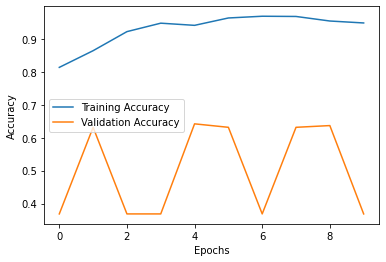

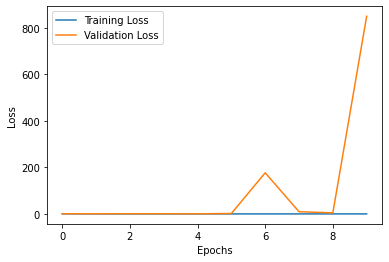

6/6 [==============================] - 3s 533ms/step - loss: 743.3812 - accuracy: 0.4474
Test Accuracy: 44.74%


In [11]:
# Plotting accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


In [17]:
model.save('police_car_detection_color_enhance_indi.h5')

C:\Users\ragha\Anaconda3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model = tf.keras.models.load_model('police_car_detection_color_enhance.h5')

In [13]:
def calculate_color_range(image_paths):
    # Calculate the average color of siren in the sample images
    average_color = np.zeros(3)
    total_pixels = 0

    for image_path in image_paths:
        img = cv2.imread(image_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Define a mask for the siren colors
        mask_siren = cv2.inRange(img_rgb, np.array([0, 0, 150]), np.array([100, 100, 255]))

        # Calculate the average color
        average_color += np.sum(np.multiply(img_rgb, np.stack([mask_siren, mask_siren, mask_siren], axis=-1)))
        total_pixels += np.sum(mask_siren)

    average_color /= total_pixels

    # Define a range around the average color
    color_range = 30  # You can adjust this value based on your preference

    lower_range = np.maximum(average_color - color_range, [0, 0, 0])
    upper_range = np.minimum(average_color + color_range, [255, 255, 255])

    return lower_range, upper_range

def prepare(filepath):
    img_array = cv2.imread(filepath)

    # Convert the image to RGB format
    img_array_rgb = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)

    # Calculate the color range dynamically based on training data
    lower_siren, upper_siren = calculate_color_range([os.path.join(Data_dir, category, img) for category in categories for img in os.listdir(os.path.join(Data_dir, category))])

    # Create a mask for siren colors
    mask_siren = cv2.inRange(img_array_rgb, lower_siren, upper_siren)

    # Apply the mask to the original image
    segmented_img = cv2.bitwise_and(img_array, img_array, mask=mask_siren)

    # Resize the segmented image to the specified size (224x224)
    resized_img = cv2.resize(segmented_img, (img_size, img_size))

    # Normalize pixel values to the range [0, 1]
    resized_img = resized_img / 255.0

    # Add an extra dimension for the batch
    resized_img = np.array(resized_img).reshape(-1, img_size, img_size, 3)

    return resized_img

In [20]:
img_size = 224
prediction = model.predict([prepare("tes2.jpg")])
print(categories[int(prediction[0][0])])

error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [24]:
prediction = model.predict([prepare("test5.jpg")])
print(categories[int(prediction[0][0])])

1/1 [==============================] - 0s 39ms/step
Police
